In [13]:
import pandas as pd
data = pd.read_csv('Customers.csv')

In [14]:
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
3,4,Female,23,16,77
104,105,Male,49,62,56
19,20,Female,35,23,98
82,83,Male,67,54,41
161,162,Female,29,79,83


In [15]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]
data.sample(5)

,Annual Income (k$),Spending Score (1-100)
183,98,88
163,81,93
108,63,43
132,72,34
97,60,50


In [17]:
data = data.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score'})
data.sample(5)

,income,score
35,33,81
154,78,16
31,30,73
190,103,23
39,37,75


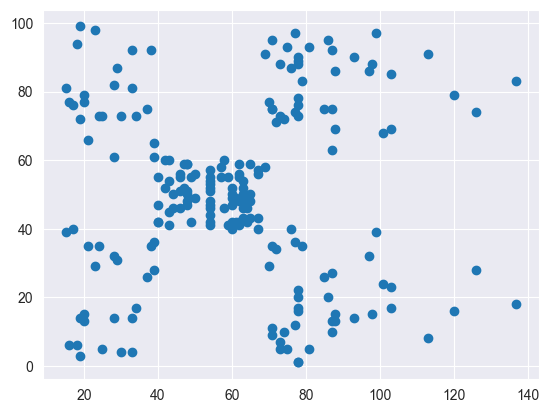

In [19]:
import matplotlib.pyplot as plt
plt.scatter(data.income, data['score'])

In [21]:
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10]
WCSS_error = []
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data[['income','score']])
    WCSS_error.append(model.inertia_)

In [22]:
WCSS_error

[269981.28,
 185917.14253928524,
 106348.37306211119,
 73679.78903948836,
 44454.47647967974,
 38788.45862332112,
 33620.471130221136,
 25387.489748976514,
 22864.513479734513,
 24643.084770042617]

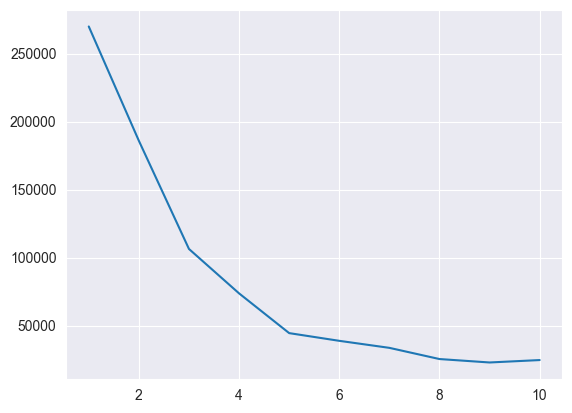

In [23]:
plt.plot(k_values, WCSS_error)

In [24]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
pred = model.fit_predict(data)

In [25]:
pred

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [26]:
data.head(5)

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [27]:
data['cluster'] = pred
data.head(5)

,income,score,cluster
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0


In [29]:
c1 = data[data['cluster']==0]
c2 = data[data['cluster']==1]
c3 = data[data['cluster']==2]
c4 = data[data['cluster']==3]
c5 = data[data['cluster']==4]

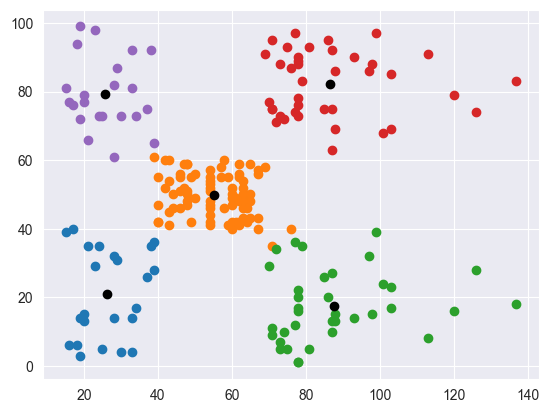

In [37]:
plt.scatter(c1['income'],c1['score'])
plt.scatter(c2['income'],c2['score'])
plt.scatter(c3['income'],c3['score'])
plt.scatter(c4['income'],c4['score'])
plt.scatter(c5['income'],c5['score'])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')

In [32]:
model.cluster_centers_

array([[26.30434783, 20.91304348],
       [55.0875    , 49.7125    ],
       [87.75      , 17.58333333],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])